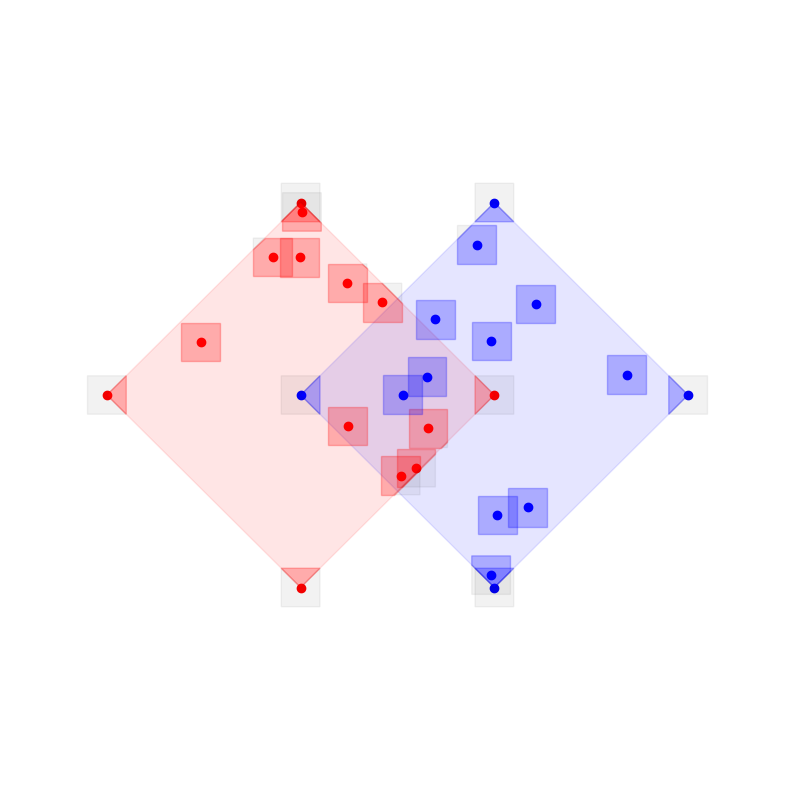

In [86]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon

# Draw two rombus with different sizes and a small intersection

fig, ax = plt.subplots(figsize=(10, 10))

# Draw a diamond
d_1 = np.array([[0, 0], [1, 1], [2, 0], [1, -1]])
ax.add_patch(plt.Polygon(d_1, color='r', alpha=0.1))
# Create a Sympy polygon from the points
d_1_sym = Polygon(d_1)

d_2 = np.array([[1, 0], [2, 1], [3, 0], [2, -1]])
ax.add_patch(plt.Polygon(d_2, color='b', alpha=0.1))
d_2_sym = Polygon(d_2)

# Set the limits of the plot to fit the two diamonds
ax.set_xlim(-.5, 3.5)
ax.set_ylim(-2, 2)

dirichlet_param = .4
# Generate 10 random points inside first diamond
points_1 = np.random.dirichlet([dirichlet_param] * len(d_1), 10)
points_1 = np.dot(points_1, d_1)
points_1 = np.concatenate((points_1, d_1))

ax.scatter(points_1[:, 0], points_1[:, 1], color='r')
for x, y in points_1:
    p = [(x - .1, y - .1), (x + .1, y - .1), (x + .1, y + .1), (x - .1, y + .1)]
    p_sym = Polygon(p)
    intersection = d_1_sym.intersection(p_sym)
    difference = p_sym.difference(intersection)
    if difference:
        ax.add_patch(plt.Polygon(difference.exterior.coords, color='k', alpha=0.05))
    if intersection:
        ax.add_patch(plt.Polygon(intersection.exterior.coords, color='r', alpha=0.25))


# Generate 10 random points inside second diamond
points_2 = np.random.dirichlet([dirichlet_param] * len(d_2), 10)
points_2 = np.dot(points_2, d_2)
points_2 = np.concatenate((points_2, d_2))

ax.scatter(points_2[:, 0], points_2[:, 1], color='b')
# For each point in the second diamond, draw a small rectangle using Polygon
for x, y in points_2:
    p = [(x - .1, y - .1), (x + .1, y - .1), (x + .1, y + .1), (x - .1, y + .1)]
    p_sym = Polygon(p)
    intersection = d_2_sym.intersection(p_sym)
    difference = p_sym.difference(intersection)
    if difference:
        ax.add_patch(plt.Polygon(difference.exterior.coords, color='k', alpha=0.05))
    if intersection:
        ax.add_patch(plt.Polygon(intersection.exterior.coords, color='b', alpha=0.25))
# Hide the axis
ax.axis('off')

plt.show()

# Save fig without background
fig.savefig('diagram.png', transparent=True, bbox_inches='tight', pad_inches=0)
